# Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# seaborn have built-in dataset!
tips = sns.load_dataset('tips')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### DistPlot

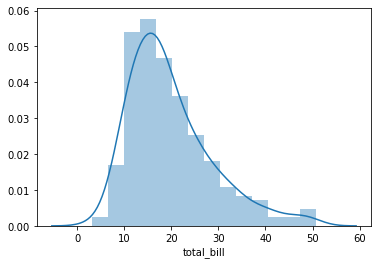

In [5]:
sns.distplot(tips['total_bill']) #histogram
#KDE: Kernal density estimation: the curved line

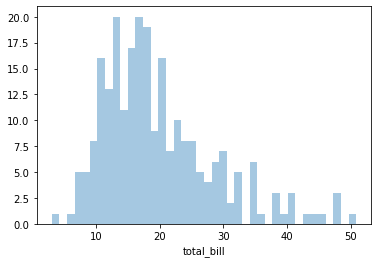

In [6]:
sns.distplot(tips['total_bill'], kde=False, bins=40)

### JointPlot

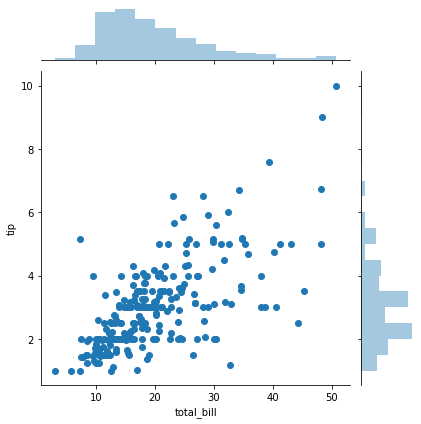

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips) #default: kind='scatter'
#2 distribution plots combined together
#in the middle is scatter plot (แผนภาพการกระจาย)
#this makes sense cause tips are usually proportionate to total bills
#right off the bat

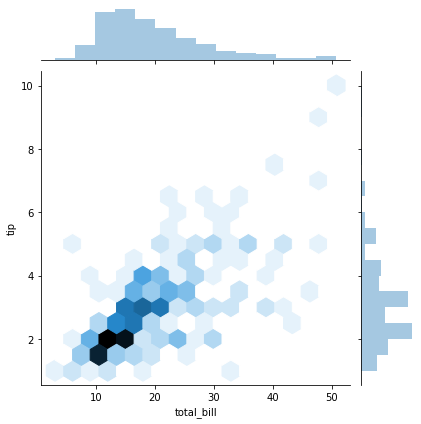

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

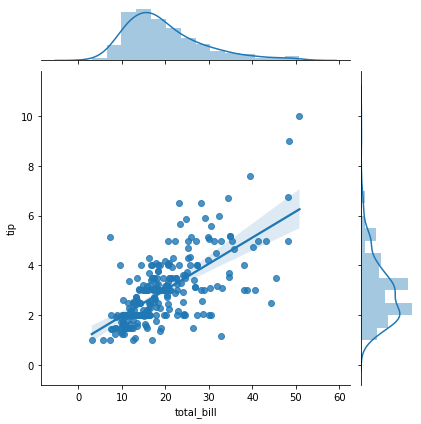

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

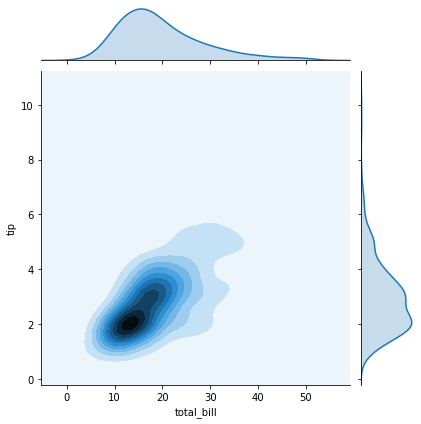

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

### Pairplot

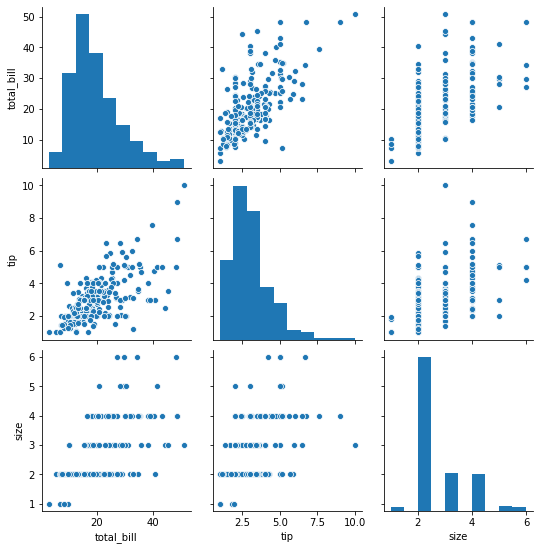

In [15]:
sns.pairplot(tips)
#what it does is ploting every pair of possible numerical columns in the data frame
#the larger dataframe, the longer pairplot takes

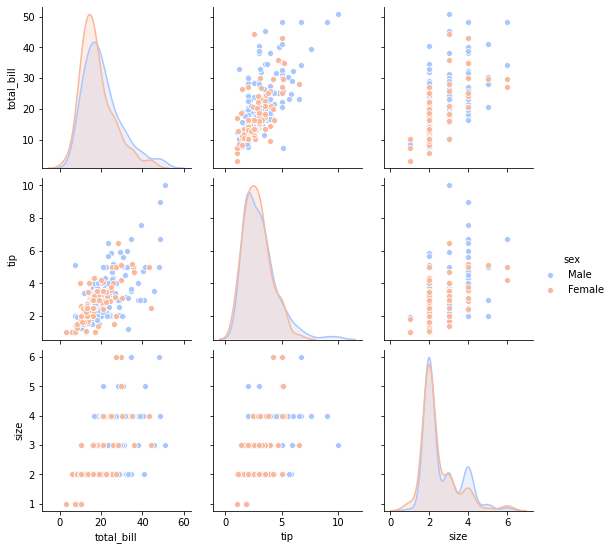

In [18]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#you can pass in a categorical column to hue.
#it will color the data points base off of the column we put in for hue.

### Rugplot

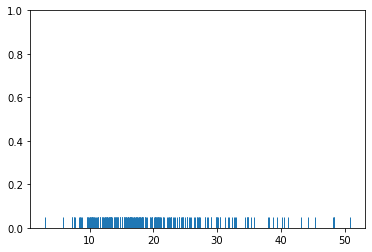

In [5]:
sns.rugplot(tips['total_bill'])

#the difference between a histogram and this rugplot is that histogram has bins and it counts how many dashes were in that bin
#and then shows it as a number, rugplot is stacked on top of each other

#rugplot = draw a dash mark for every single point along the distribution line.

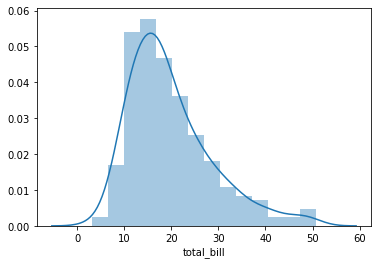

In [27]:
sns.distplot(tips['total_bill'])

(0.0, 1.0)

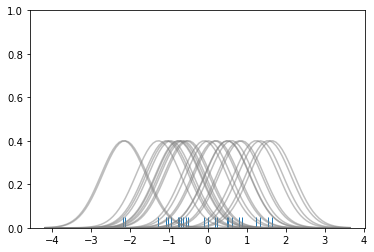

In [8]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

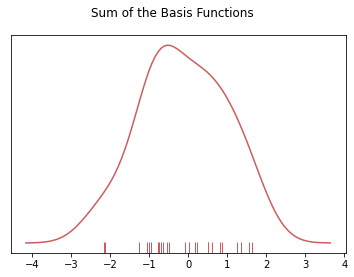

In [9]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")


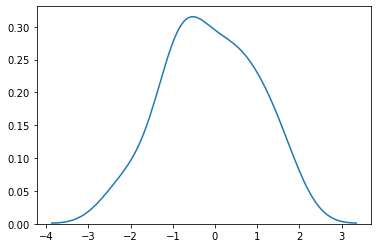

In [11]:
sns.kdeplot(dataset)

#### KDE: Kernel density estimation is kind of the sum of all the normal distribution around the rugplot

<hr style='border:0.75px solid black'> </hr>

# Categorical Data Plot

In [12]:
import seaborn as sns
%matplotlib inline

In [21]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


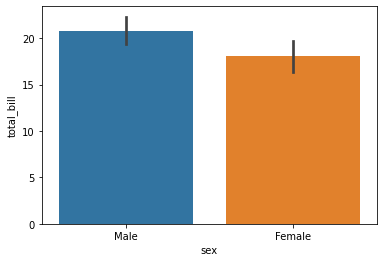

In [14]:
#barplot
sns.barplot(x='sex',y='total_bill',data=tips)

In [16]:
import numpy as np

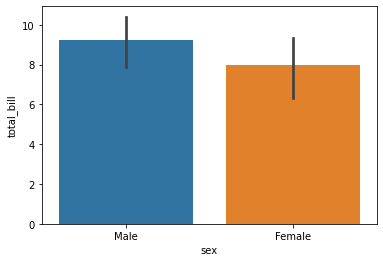

In [20]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator= np.std) #aggregate function

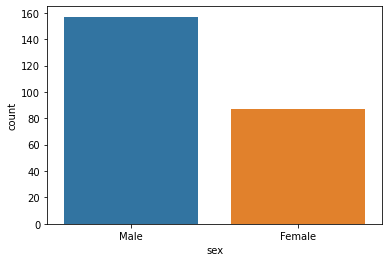

In [22]:
#countplot
sns.countplot(x='sex',data=tips) #it's like pandas.count()

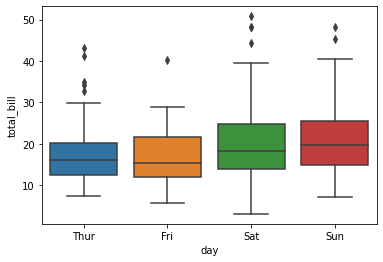

In [23]:
#boxplot
sns.boxplot(x='day',y='total_bill',data=tips)
#shows the Quartiles of the dataset
#individual dots that are in-line with whiskers are called outlier.

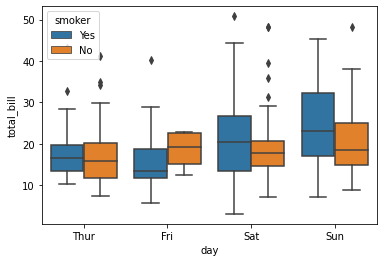

In [24]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

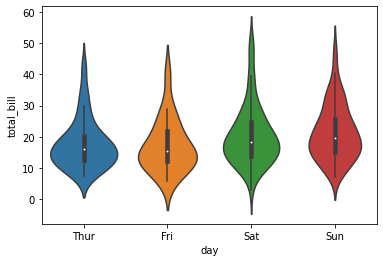

In [25]:
#violinplot
sns.violinplot(x='day',y='total_bill',data=tips)
#showing KDE

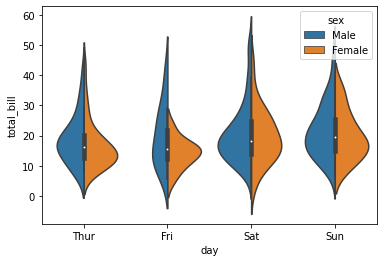

In [27]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

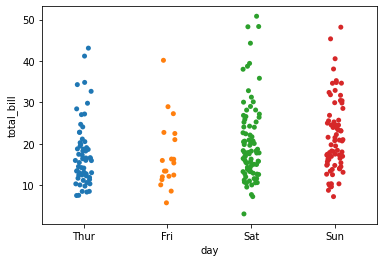

In [28]:
#stripplot
sns.stripplot(x='day',y='total_bill',data=tips)
#scatterplot

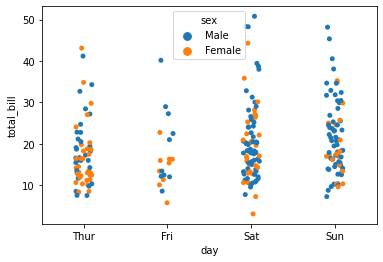

In [29]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex')

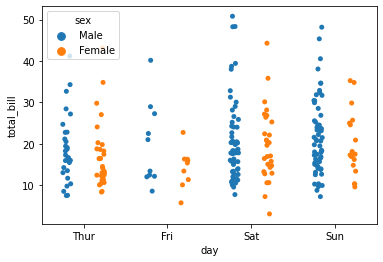

In [31]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)

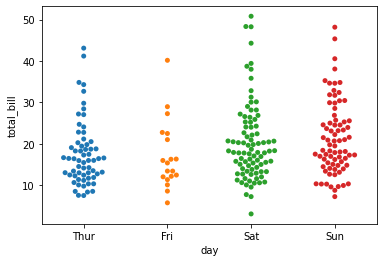

In [32]:
#swarmplot
sns.swarmplot(x='day',y='total_bill',data=tips)

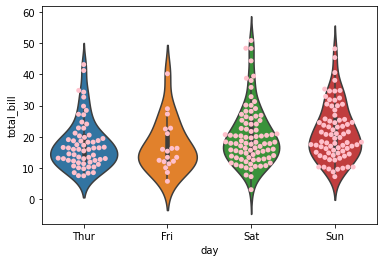

In [35]:
#integrated
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='pink')

C:\Users\picek\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


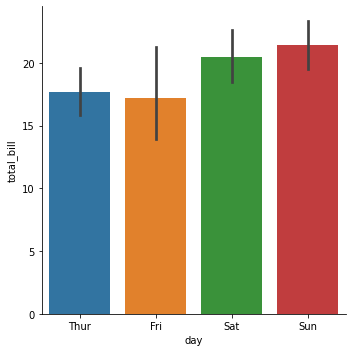

In [36]:
#factorplot
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

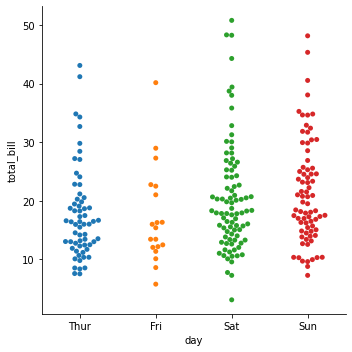

In [41]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='swarm')

<hr style='border:0.75px solid black'></hr>

# Matrix Plot

In [42]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [43]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [45]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


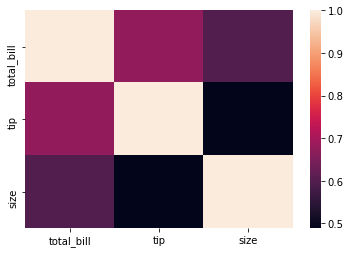

In [46]:
sns.heatmap(tc)

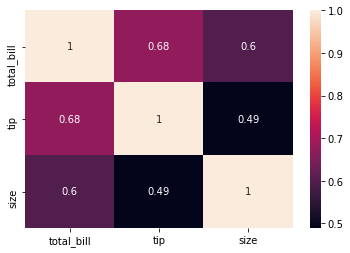

In [47]:
sns.heatmap(tc,annot=True) #annot = annotate = ใส่คำอธิบายลงไป

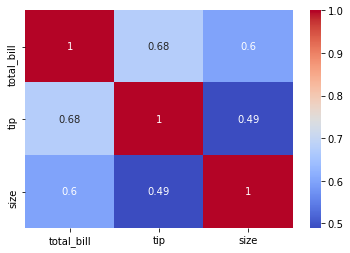

In [48]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [53]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')
#to convert dataset to be a form of matrix first
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


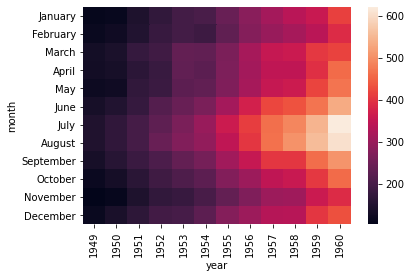

In [56]:
sns.heatmap(fp)

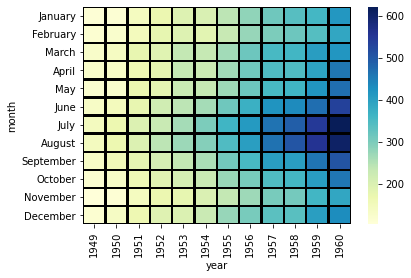

In [65]:
sns.heatmap(fp,cmap='YlGnBu',linecolor='black',linewidths=1.5)

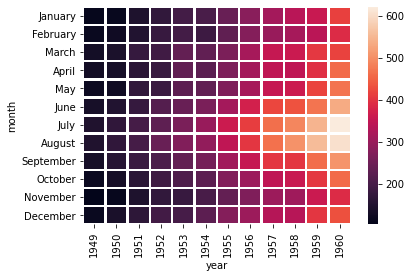

In [59]:
sns.heatmap(fp,linecolor='white',linewidths=1.5)

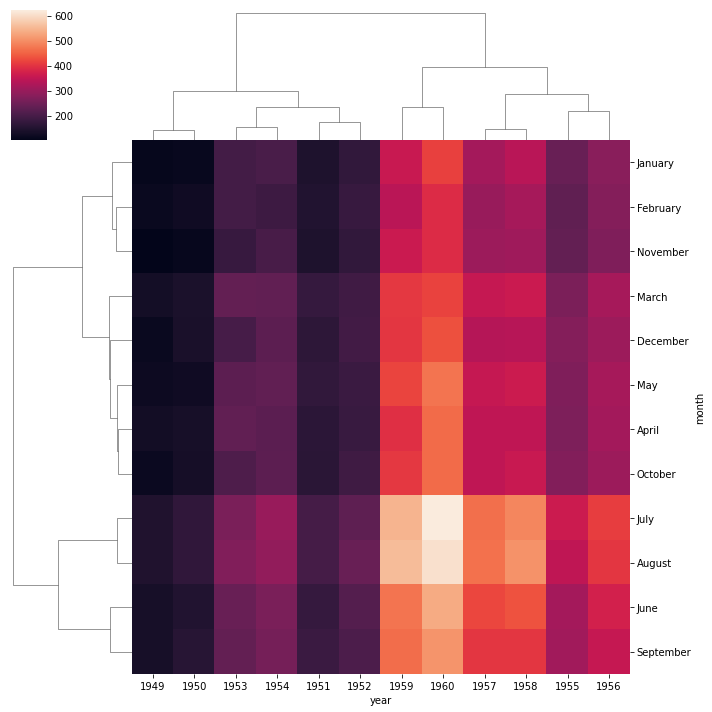

In [67]:
#cluster map
sns.clustermap(fp)
#cluster the informations to show columns and rows that are similar to each other
#No longer in order, all the months have been clustered to most similar months being put together, same thing for years

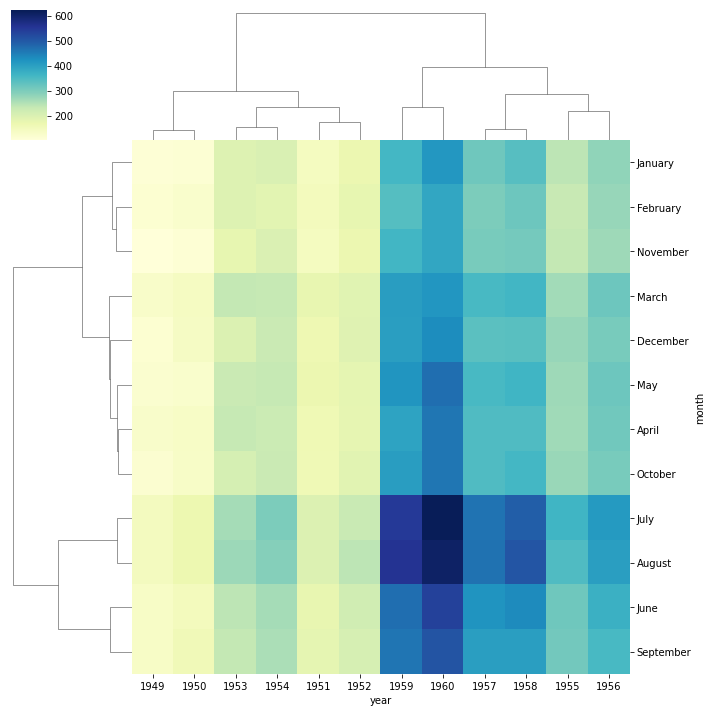

In [71]:
sns.clustermap(fp,cmap='YlGnBu')

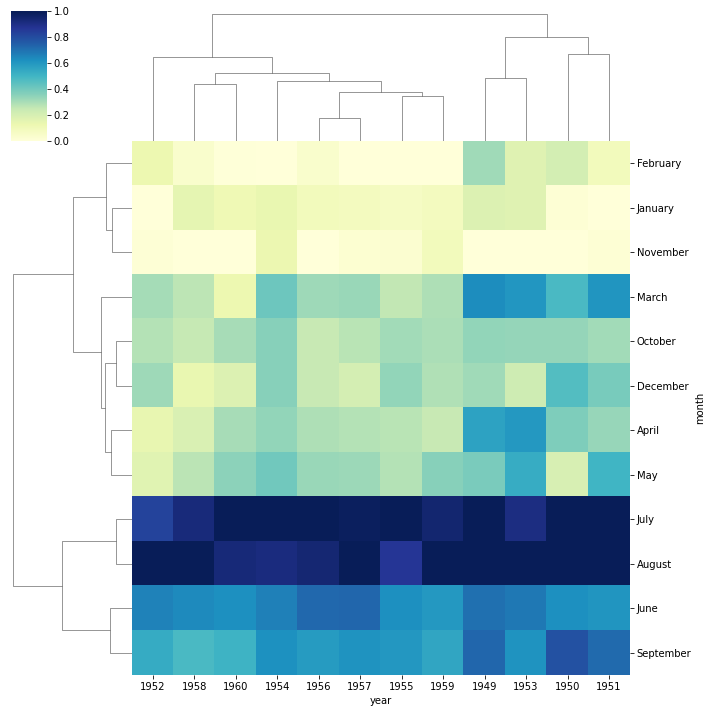

In [70]:
sns.clustermap(fp,cmap='YlGnBu',standard_scale=1)
#normalized scale

<hr style='border: 0.75px solid black'></hr>